# [Introduction to feature extraction](https://github.com/Ziaeemehr/vbi_paper/blob/main/docs/examples/intro_feature.ipynb)

<a href="https://colab.research.google.com/github/Ziaeemehr/vbi_paper/blob/main/docs/examples/intro_feature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import vbi
import numpy as np
import matplotlib.pyplot as plt
from vbi import report_cfg
from vbi import extract_features_df, extract_features_list
from vbi import get_features_by_domain, get_features_by_given_names

(88, 208)


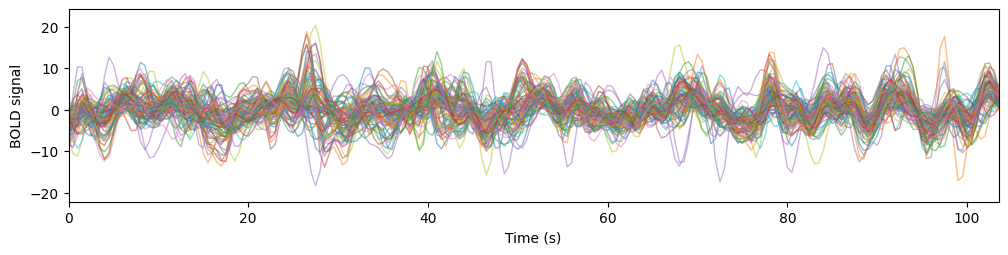

In [2]:
D = vbi.LoadSample(nn=88)
ts = D.get_bold()
print(ts.shape)

plt.figure(figsize=(12,2.5))
plt.plot(np.arange(ts.shape[1])*0.5, ts.T, lw=1, alpha=0.5);
plt.margins(0, 0.1)
plt.xlabel("Time (s)")
plt.ylabel("BOLD signal");

In [3]:
cfg = get_features_by_domain(domain="connectivity")
cfg = get_features_by_given_names(cfg, ['fc_stat'])
cfg = vbi.update_cfg(cfg, 'fc_stat', {"features":["sum"], "fc_function":"corrcoef"})
report_cfg(cfg)

Selected features:
------------------
■ Domain: connectivity
 ▢ Function:  fc_stat
   ▫ description:  Extracts features from functional connectivity (FC).
   ▫ function   :  vbi.feature_extraction.features.fc_stat
   ▫ parameters :  {'k': 0, 'masks': None, 'positive': False, 'verbose': False, 'eigenvalues': True, 'pca_num_components': 3, 'fc_function': 'corrcoef', 'quantiles': [0.05, 0.25, 0.5, 0.75, 0.95], 'features': ['sum']}
   ▫ tag        :  all
   ▫ use        :  yes


In [4]:
data = extract_features_list([ts], 0.5, cfg)
data


  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 157.36it/s]

([array([-5.5172849e-02,  1.8978356e-01,  3.6331561e-01,  5.4156488e-01,
          7.6214993e-01, -8.8817842e-15,  1.0000000e+00,  1.3969272e+03,
          2.9416184e+03], dtype=float32)],
 ['fc_full_quantile_0.05',
  'fc_full_quantile_0.25',
  'fc_full_quantile_0.5',
  'fc_full_quantile_0.75',
  'fc_full_quantile_0.95',
  'fc_full_pca_sum',
  'fc_full_eig_sum',
  'fc_full_ut_sum',
  'fc_full_sum'])

In [5]:
data = extract_features_df([ts, ts], 0.5, cfg, n_workers=2)
data


  0%|          | 0/2 [00:00<?, ?it/s]


100%|██████████| 2/2 [00:00<00:00, 172.80it/s]

,fc_full_quantile_0.05,fc_full_quantile_0.25,fc_full_quantile_0.5,fc_full_quantile_0.75,fc_full_quantile_0.95,fc_full_pca_sum,fc_full_eig_sum,fc_full_ut_sum,fc_full_sum
0,-0.055173,0.189784,0.363316,0.541565,0.76215,-8.881784e-15,1.0,1396.927246,2941.618408
1,-0.055173,0.189784,0.363316,0.541565,0.76215,-8.881784e-15,1.0,1396.927246,2941.618408


Add custom features

In [6]:
from vbi import add_features_from_json
import my_features

cfg = add_features_from_json("my_features.json", my_features)
report_cfg(cfg)

Selected features:
------------------
■ Domain: statistical
 ▢ Function:  mean
   ▫ description:  
   ▫ function   :  mean
   ▫ parameters :  {'arg1': 1.0, 'arg2': 2.0}
   ▫ tag        :  all
   ▫ use        :  yes
 ▢ Function:  std
   ▫ description:  
   ▫ function   :  std
   ▫ parameters :  {'arg1': 1.0, 'arg2': 2.0}
   ▫ tag        :  all
   ▫ use        :  yes


In [7]:
data = extract_features_df([ts, ts], 0.5, cfg, n_workers=2)
data


  0%|          | 0/2 [00:00<?, ?it/s]


100%|██████████| 2/2 [00:00<00:00, 190.50it/s]

,m_0,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,...,s_78,s_79,s_80,s_81,s_82,s_83,s_84,s_85,s_86,s_87
0,0.017111,0.009509,0.029611,0.006994,0.025506,0.029548,0.029585,-0.01176,-0.039832,0.018644,...,3.790679,3.203614,2.421138,2.160106,4.565415,3.082228,3.249217,1.872746,3.495425,1.700081
1,0.017111,0.009509,0.029611,0.006994,0.025506,0.029548,0.029585,-0.01176,-0.039832,0.018644,...,3.790679,3.203614,2.421138,2.160106,4.565415,3.082228,3.249217,1.872746,3.495425,1.700081
